# Detect_License Plate Number (Phát hiện biển số xe máy) 

- Một phần trong bài toán nhận diện biển số xe
- Dataset : https://github.com/thigiacmaytinh/DataThiGiacMayTinh/blob/main/GreenParking.zip

In [65]:
import cv2
import random
import matplotlib.pyplot as plt

#### Đa dạng kích thước của biển số

In [66]:
def show_img(image1, image2):
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 2, 1) # plt.subplot(nrows, ncols, index)
    image = cv2.imread(image1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  
    plt.subplot(1, 2, 2)
    image = cv2.imread(image2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  
    plt.show()

In [67]:
# Cách1
def add_border(image_path, output_path, low, high):
    # random các kích thưc biên trong khong (low, high)
    top = random.randint(low, high)
    bottom = random.randint(low, high)
    left = random.randint(low, high)
    right = random.randint(low, high)
    image = cv2.imread(image_path)
    original_width, original_height = image.shape[1], image.shape[0]
    #sdng hàm ca opencv đ thêm biên
    image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_REPLICATE)
    #sau đó resize nh bng kích thưc ban đu ca nh
    image = cv2.resize(image, (original_width, original_height))
    cv2.imwrite(output_path, image)

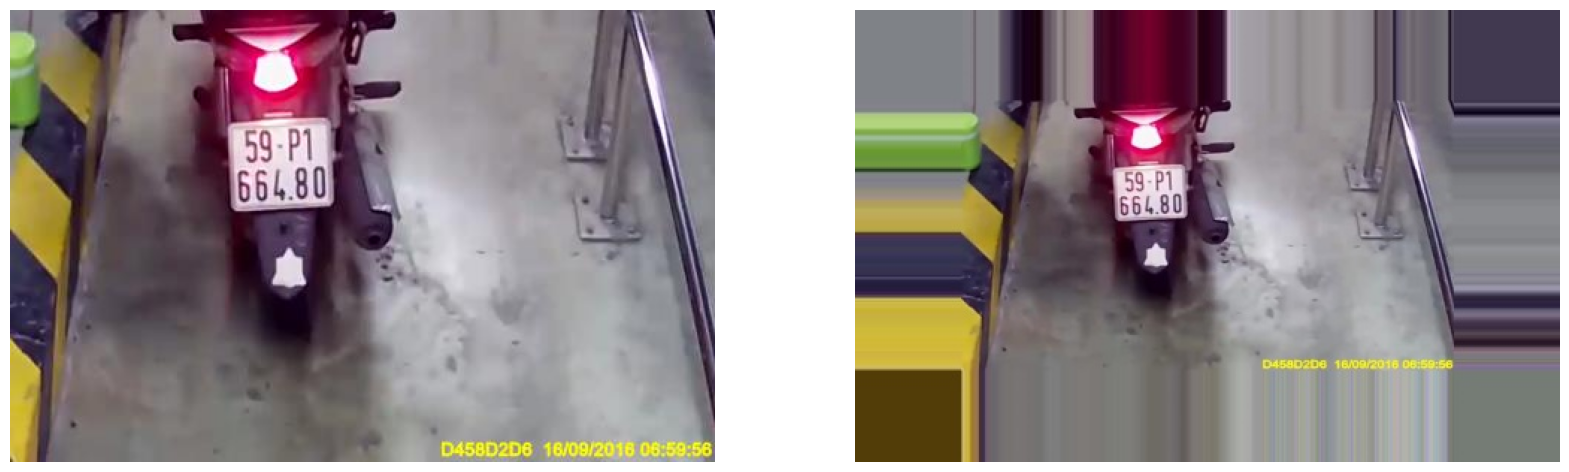

In [68]:
add_border("input.jpg", "output.jpg", 100, 100)
show_img("input.jpg", "output.jpg")

In [69]:
# Cách2
def random_crop(image_path, out_path):
    image = cv2.imread(image_path)
    original_width, original_height = image.shape[1], image.shape[0]
    x_center,y_center = original_height//2, original_width//2
    x_left = random.randint(0, x_center//2)
    x_right = random.randint(original_width-x_center//2, original_width)
    y_top = random.randint(0, y_center//2)
    y_bottom = random.randint(original_height-y_center//2, original_width)
    # crop ra vùng nh vi kích thưc ngu nhiên
    cropped_image = image[y_top:y_bottom, x_left:x_right]
    # resize nh bng kích thư c nh ban đu
    cropped_image = cv2.resize(cropped_image, (original_width, original_height))
    cv2.imwrite(out_path, cropped_image)

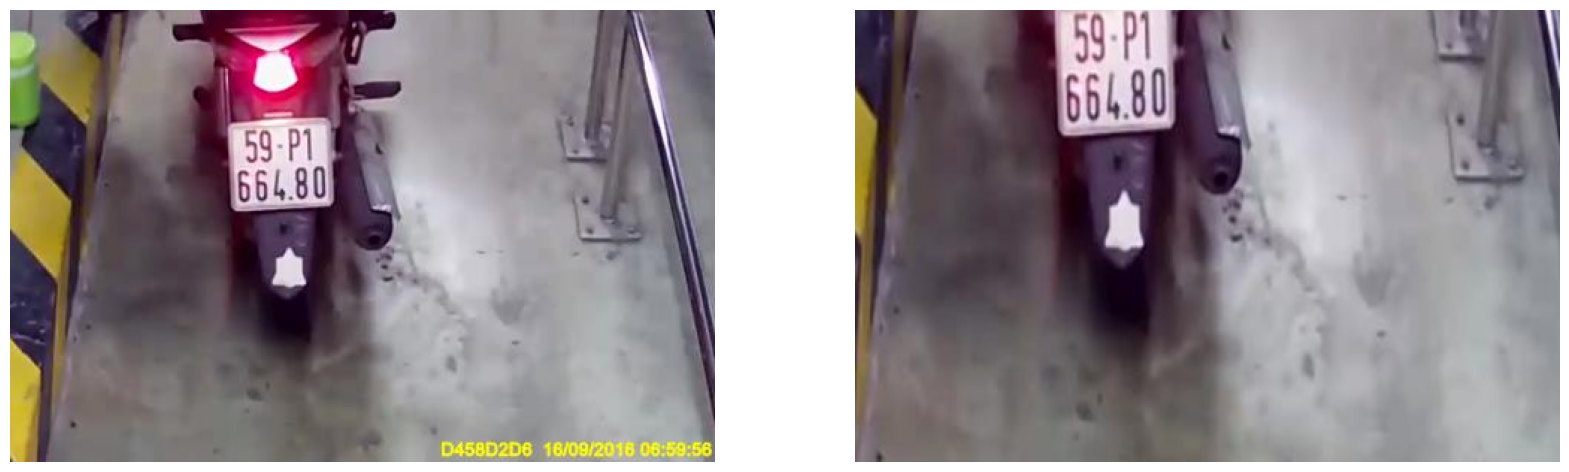

In [70]:
# Sử dụng hàm để cắt ảnh và lưu
random_crop('input.jpg', 'output_image_c2.jpg')
show_img("input.jpg", "output_image_c2.jpg")

####  Thay đổi độ sáng của ảnh

In [71]:
def change_brightness(image_path, output_path, value):
    """
    value: đ sáng thay đi
    """
    img=cv2.imread(image_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    cv2.imwrite(output_path, img)

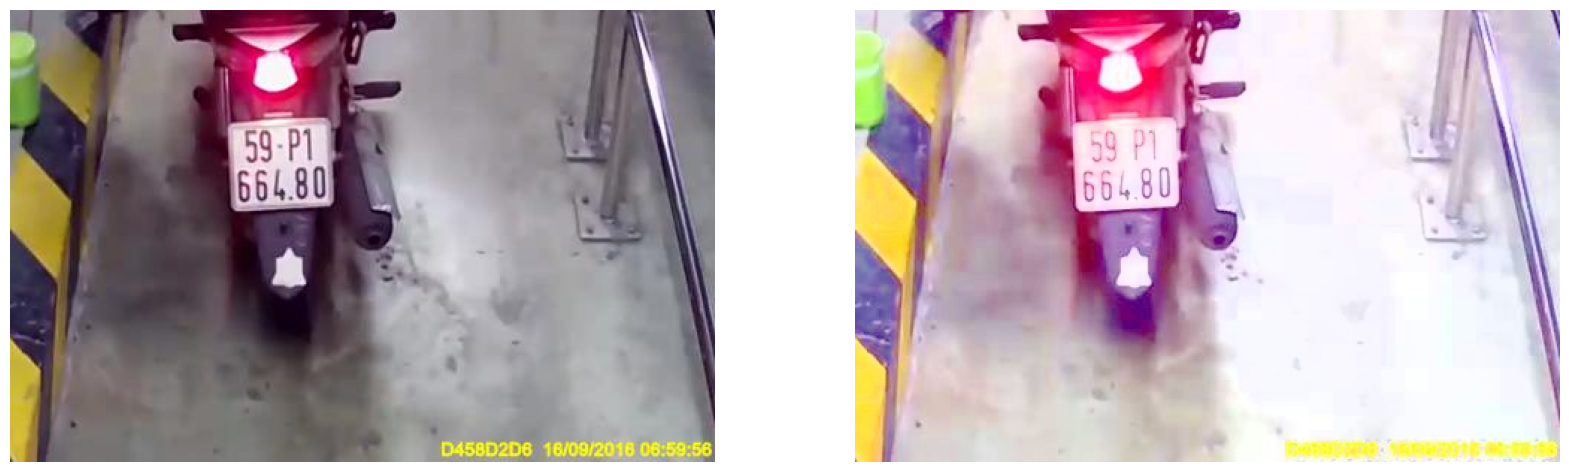

In [72]:
# Sử dụng hàm để thay đổi độ sáng của ảnh và lưu lại
change_brightness('input.jpg', 'output_image_brightness.jpg', 100)  # Thay đổi độ sáng lên 50
show_img("input.jpg", "output_image_brightness.jpg")

#### Xoay ảnh

In [73]:
import imutils
def rotate_image(image_path, range_angle, output_path):
    image = cv2.imread(image_path)
    #la chn ngu nhiên góc quay
    angle = random.randint(-range_angle, range_angle)
    img_rot = imutils.rotate(image, angle)
    cv2.imwrite(output_path, img_rot)

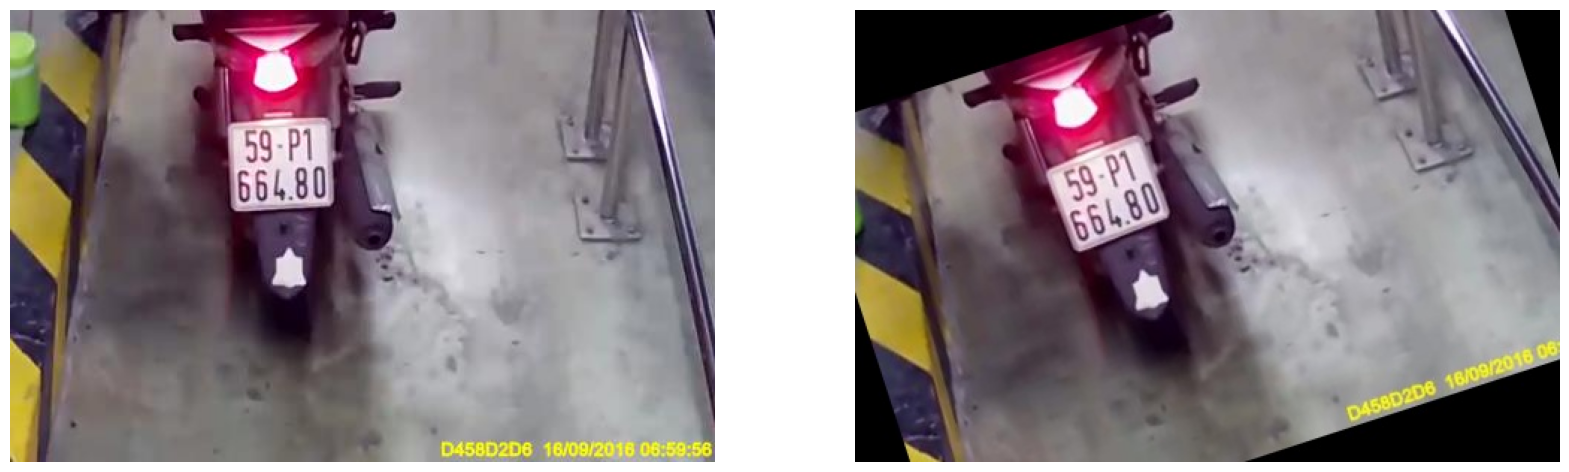

In [79]:
rotate_image('input.jpg', 60, 'output_image_rotate.jpg')  # Phạm vi góc quay từ -30 đến 30 độ
show_img("input.jpg", "output_image_rotate.jpg")